In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data and Process Missing Value 

In [34]:
train_path = 'train_V2.csv'
train=pd.read_csv(train_path)
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [36]:
#drop missing value

null_cnt = train.isnull().sum().sort_values()
print(null_cnt[null_cnt > 0])
# dropna
train.dropna(inplace=True)

winPlacePerc    1
dtype: int64


#Date Exploration

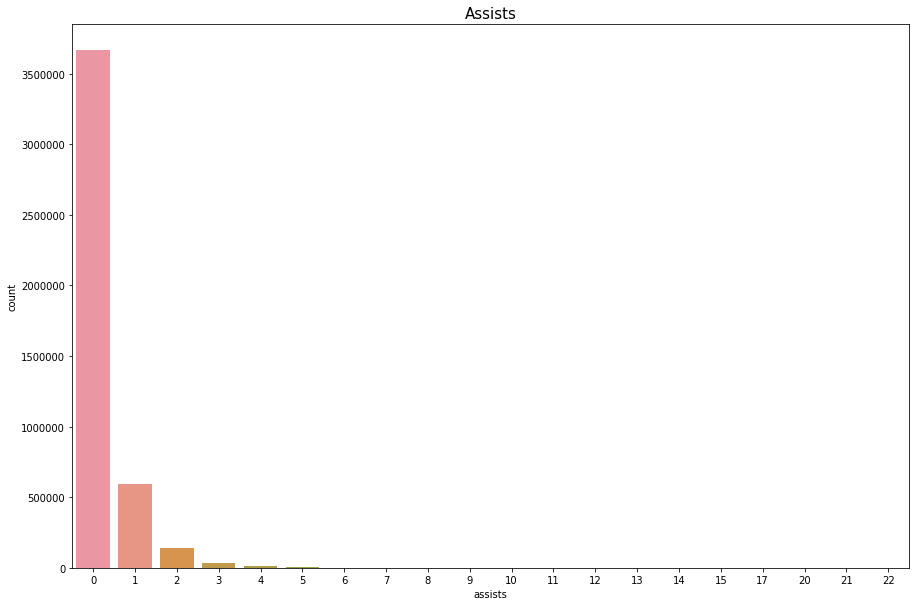

In [37]:
plt.figure(figsize=(15,10))
sns.countplot(train['assists'].sort_values())
plt.title("Assists",fontsize=15)
plt.show()

### Most players do not get any assist in a game

In [38]:
## winners
winners = train[train['winPlacePerc']==1]
len(winners)

127573

In [39]:
## How many ppl win without any assists? What percent of winners do not have any assists?
winners_no_assist = winners[winners['assists']==0]
print(len(winners_no_assist))
print(len(winners_no_assist)/len(winners))

49804
0.3903960869462974


### 49804 (39%) winners do not have any assists in the game.

## Boosts

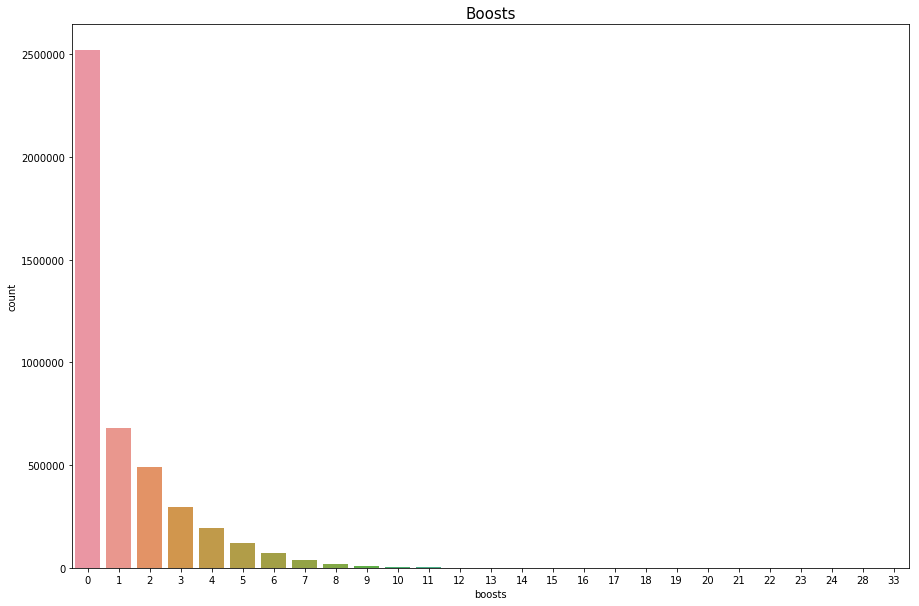

In [40]:
plt.figure(figsize=(15,10))
sns.countplot(train['boosts'].sort_values())
plt.title("Boosts",fontsize=15)
plt.show()

### Most players do not use any boost during the game.

In [41]:
## How many ppl win without any boosts? What percent of winners do not have any boosts?
winners_no_boost = winners[winners['boosts']==0]
print(len(winners_no_boost))
print(len(winners_no_boost)/len(winners))

9856
0.07725772694849224


### 9856 (7.73%) winners do not use any boosts in the game.

## Kills


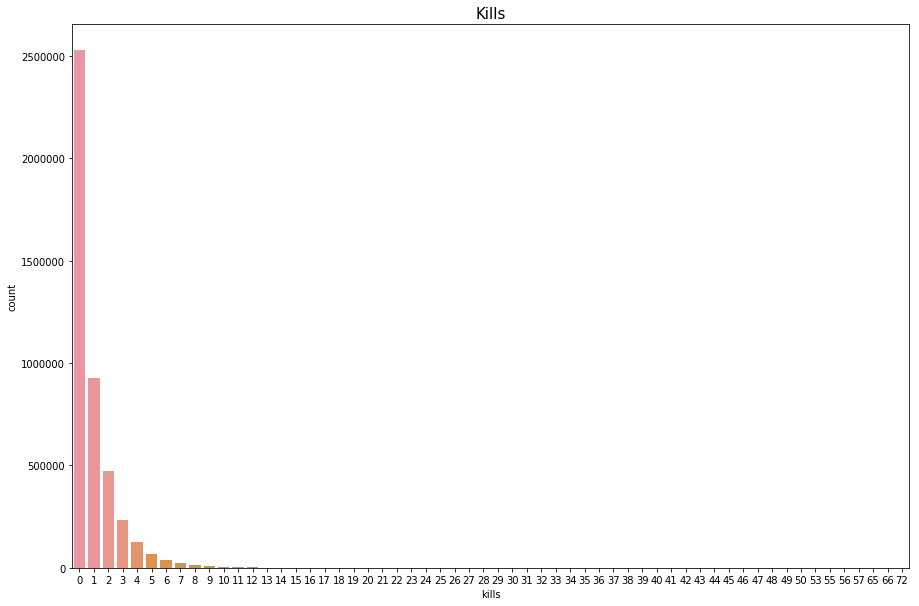

In [42]:
plt.figure(figsize = (15,10))
sns.countplot(train['kills'].sort_values())
plt.title('Kills',fontsize = 15)
plt.show()

### Majority of players do not have any kills during a game.

In [43]:
## How many ppl win without any kill? What percent of winners do not have any kill?
winners_no_kill = winners[winners['kills']==0]
print(len(winners_no_kill))
print(len(winners_no_kill)/len(winners))

16666
0.13063892829987536


### 16666 (13.06%) winners do not have any kill in the game.

/Users/lorenzo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lorenzo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


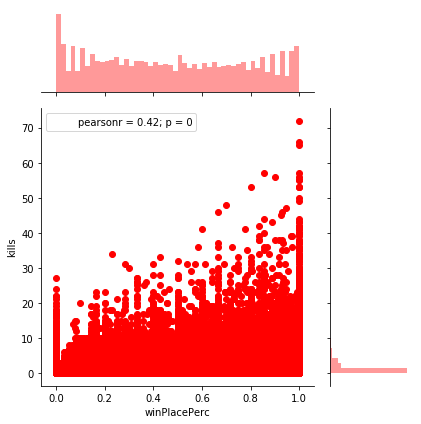

In [44]:
sns.jointplot(x="winPlacePerc", y="kills", data=train, ratio=3, color="r")
plt.show()

### More kills seem to result in a higher place in the ranking

# Ride Distance

/Users/lorenzo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


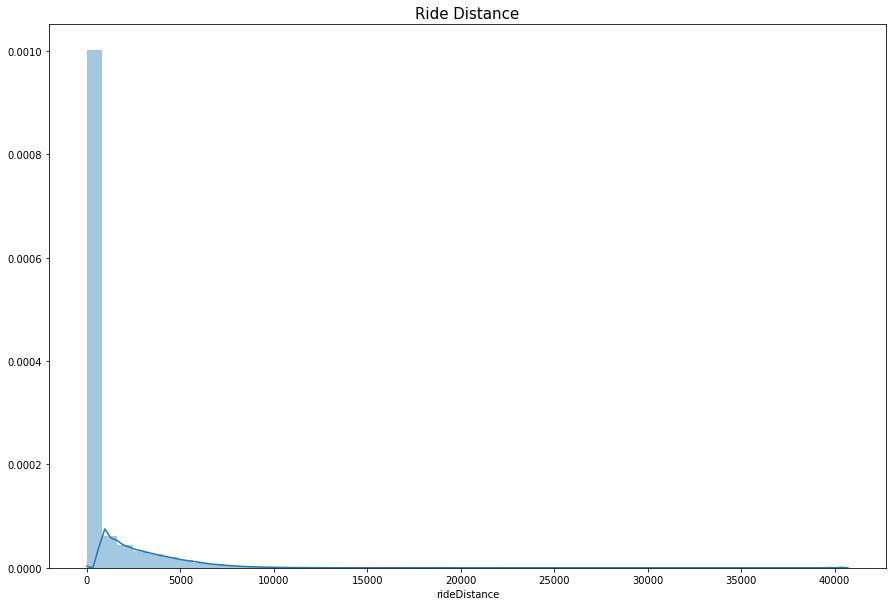

In [45]:
plt.figure(figsize = (15,10))
sns.distplot(train['rideDistance'])
plt.title('Ride Distance',fontsize = 15)
plt.show()

In [46]:
print(len(train[train['rideDistance']==0])/len(train))

0.7441992460026108


### 74.42% of players do not drive at all in the game

In [48]:
print(len(winners[winners['rideDistance']==0])/len(winners))

0.4946422832417518


### 49.46% winners do not drive at all in the game.
### They must walk a lot given the fact that there is a blue zone to run away in the game.

In [49]:
winners_no_drive = winners[winners['rideDistance']==0]
winners_drive = winners[winners['rideDistance']!=0]
print(winners_no_drive.walkDistance.mean())
print(winners_drive.walkDistance.mean())

2878.739425491656
3049.6611386381264


### The mean of group of winners who drive is actually higher than that of the group of winners who do not drive.
### Not as expected.

/Users/lorenzo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lorenzo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


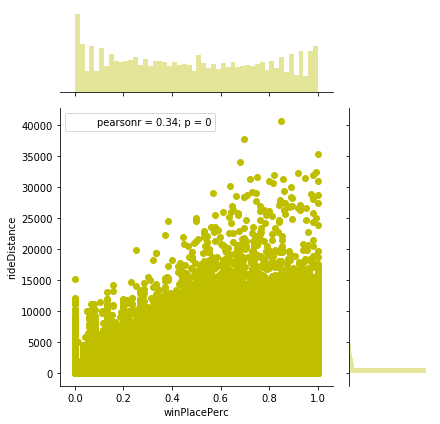

In [50]:
sns.jointplot(x="winPlacePerc", y="rideDistance", data=train, ratio=3, color="y")
plt.show()

/Users/lorenzo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lorenzo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


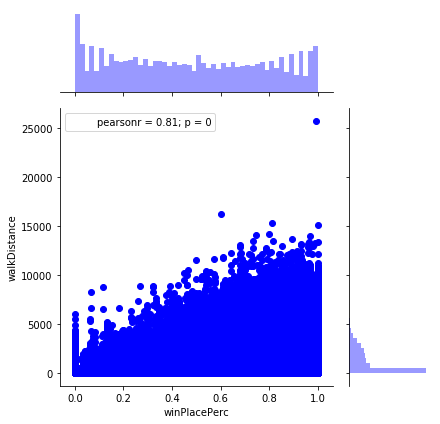

In [51]:
sns.jointplot(x="winPlacePerc", y="walkDistance", data=train, ratio=3, color="b")
plt.show()

### It seems that both walk distance and ride distance are helpful to get higher rank in the game

## Heals

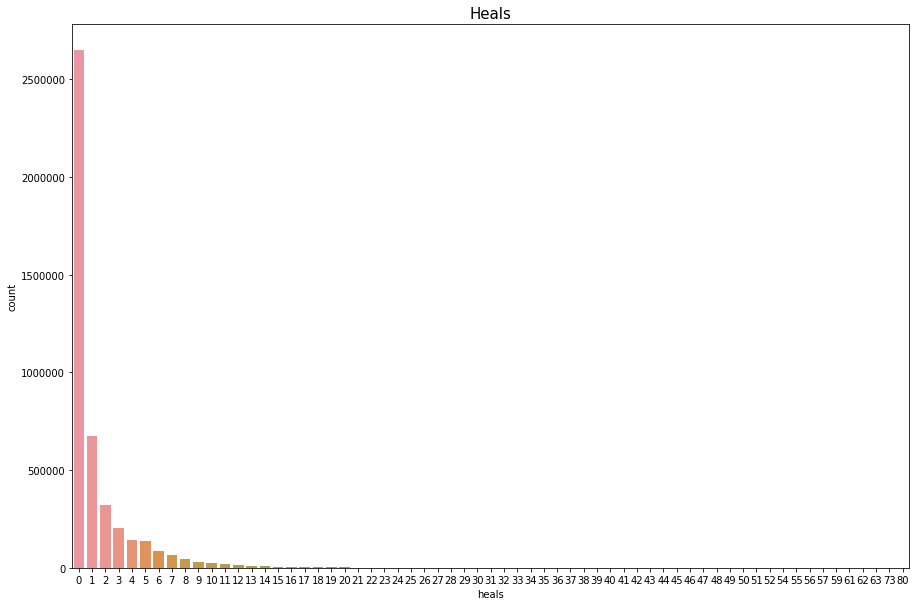

In [52]:
plt.figure(figsize = (15,10))
sns.countplot(train['heals'].sort_values())
plt.title('Heals',fontsize = 15)
plt.show()

### Most ppl do not heal in the game

In [53]:
## How many ppl win without any heal? What percent of winners do not have any heal?
winners_no_heal = winners[winners['heals']==0]
print(len(winners_no_heal))
print(len(winners_no_heal)/len(winners))

20889
0.16374154405712807


### 20889 (16.37%) winners do not use any heal in the game.

/Users/lorenzo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lorenzo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


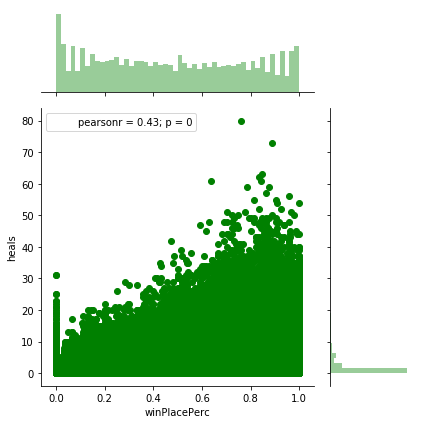

In [54]:
sns.jointplot(x="winPlacePerc", y="heals", data=train, ratio=3, color="g")
plt.show()

### Heals seem to be important to win in the game.

# Seems that kill, heal, assist, boost, walk distance and drive distance are important features.

# Pearson correlation

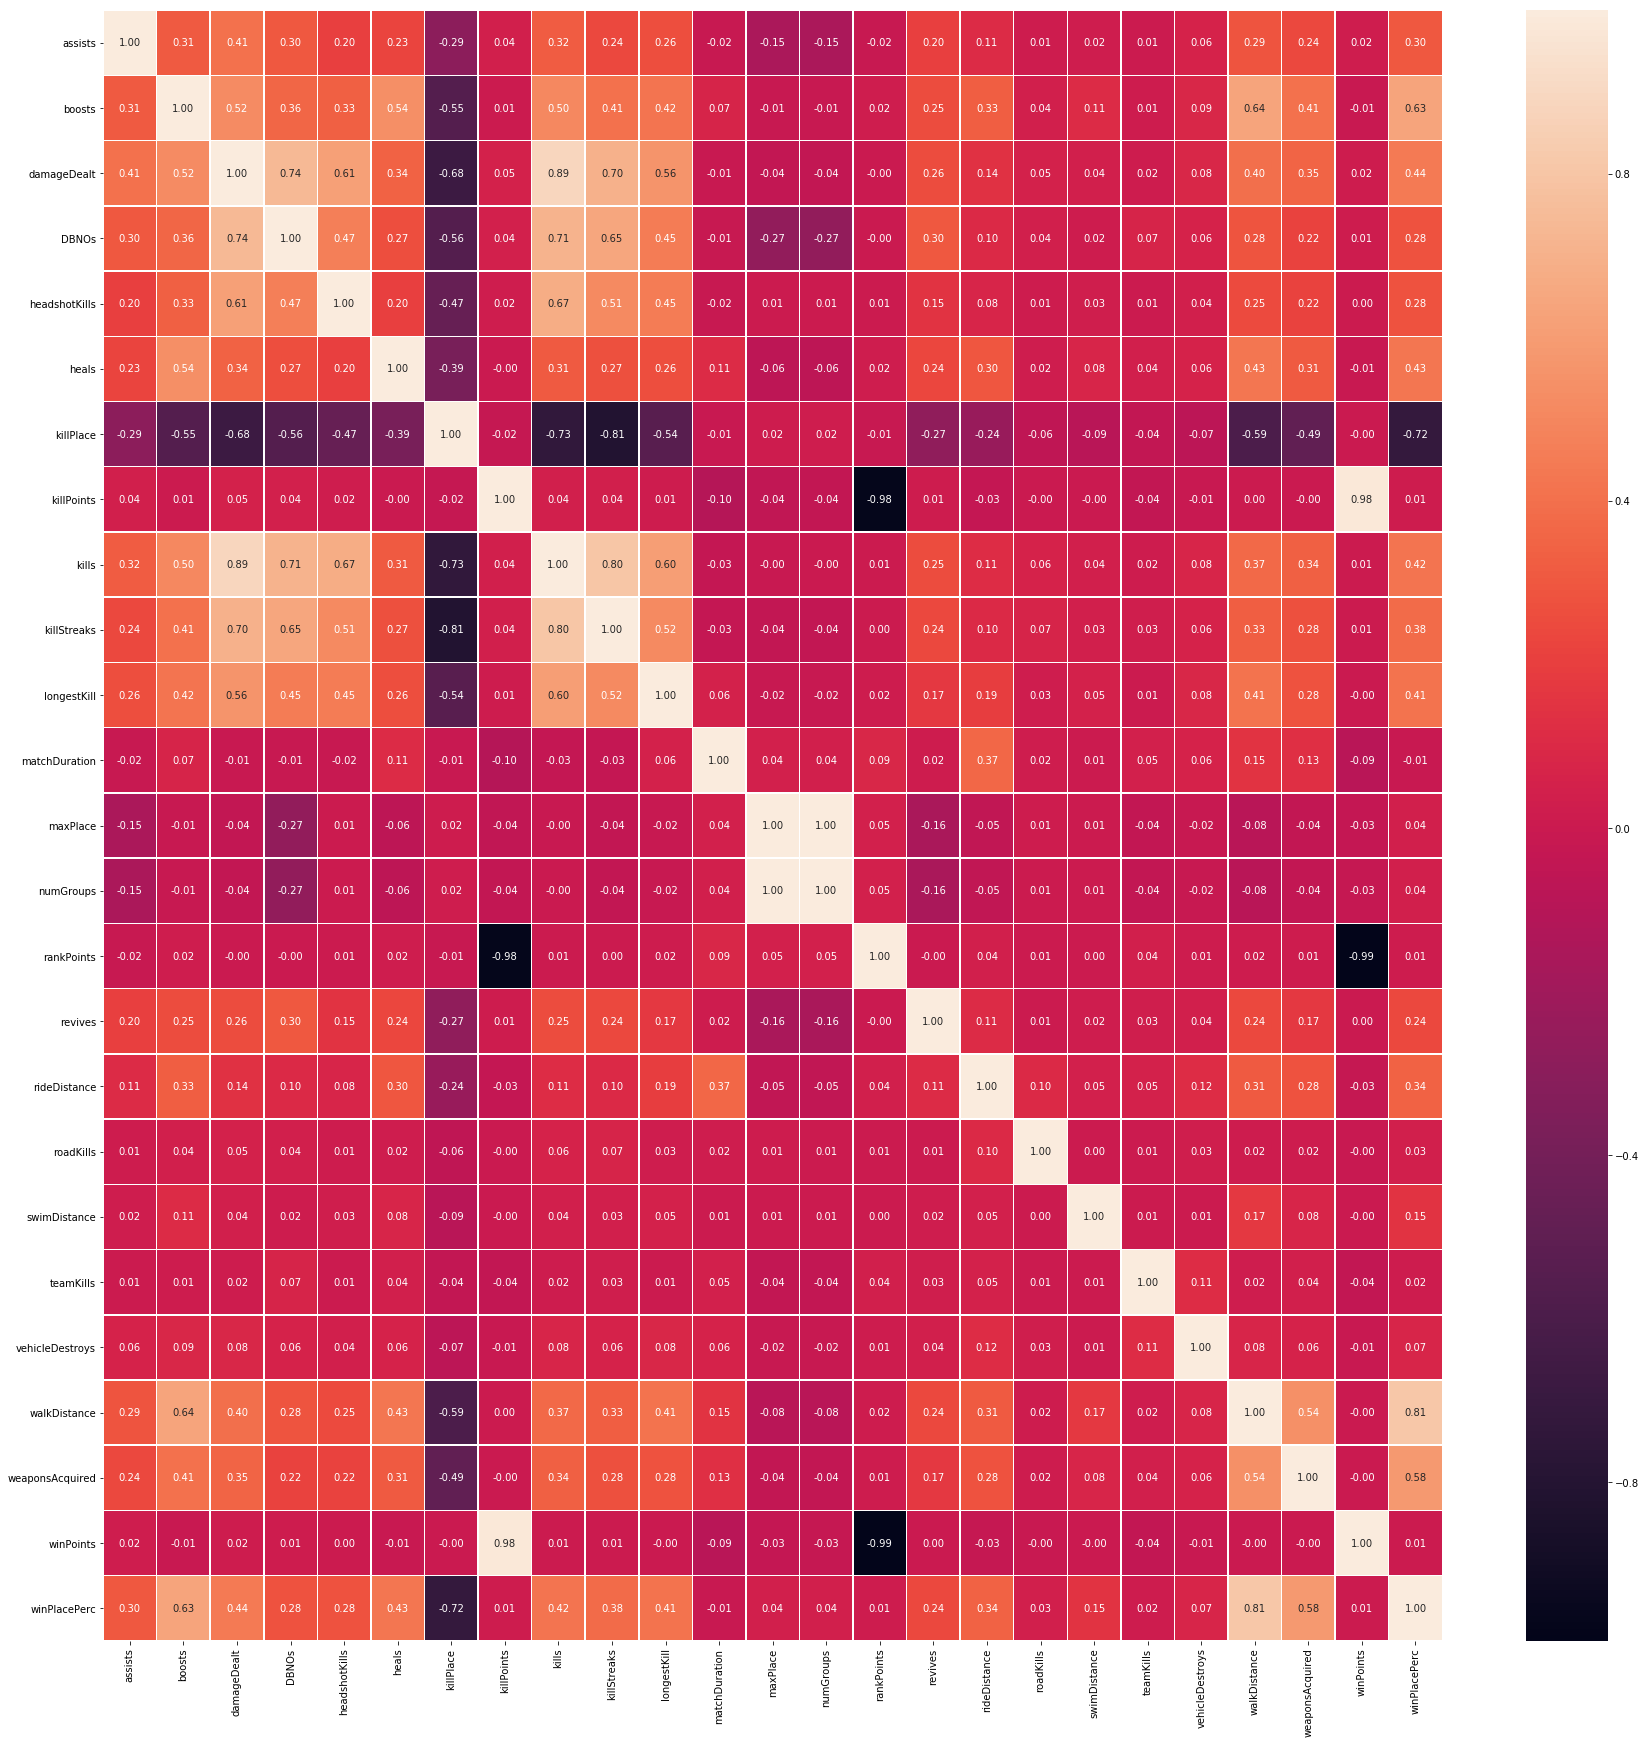

In [55]:
f,ax = plt.subplots(figsize=(30, 30))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

# Based on the heat map, regressors boosts, walkDistance, weaponsAcquired, and totalDistance are highly positively linearly correlated with winPlacePerc, while killPlace is highly negatively linearly correlated to response. killPoints(exactly 0), matchDuration, maxPlace, numGroups, rankPoints, roadkills, teamKills, winPoints,solo, and squad have near zero linear correlation to the response.

# Results of Pearson correlation have validated the conclusions and hypothesis proposed in EDA since factors identified as important features indeed have noticeable linear correlationship with winPlacePerc.

#Feature Engineering

Create playerJoined feature to normalize some features. Because these features are closely related with number of palyers

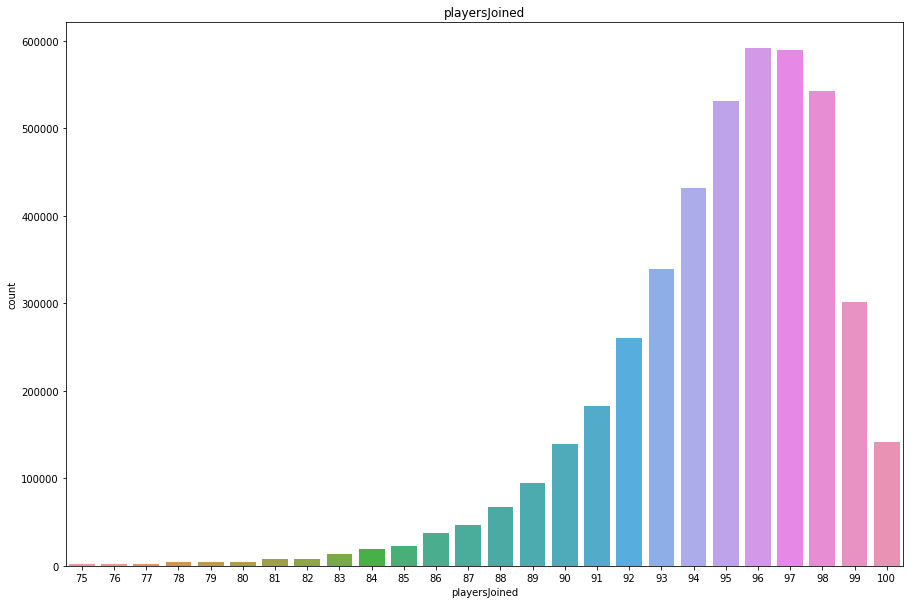

In [5]:
train['playersJoined'] = train.groupby('matchId')['matchId'].transform('count')
plt.figure(figsize=(15,10))
sns.countplot(train[train['playersJoined']>=75]['playersJoined'])
plt.title('playersJoined')
plt.show()

normalize the features  
i.e. kills, damageDealt, maxPlace, matchDuration

In [6]:
def norm_feature(col):
  train[col]=train[col]*((100-train['playersJoined'])/100+1)


norm_feature('kills')
norm_feature('damageDealt')
norm_feature('maxPlace')
norm_feature('matchDuration')

Reduce the number of types of feature 'matchType' into 3. 
Avoid to create too many dummy variables after one hot encoding

In [7]:
mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
train['matchType'] = train['matchType'].map(mapper)
temp=pd.get_dummies(train['matchType'],drop_first=True)

In [8]:
train=pd.concat([train,temp],axis=1)

drop some columns because they don't add any prediction power
i.e. groupId, matchId, playerJoined

In [9]:
drop_col=['groupId','matchId','playersJoined','matchType']
train=train.drop(drop_col,axis=1)

Build some new features which we think may be helpful to improve the performance of our model

In [10]:
train['totalDistance'] = train['rideDistance'] + train['walkDistance'] + train['swimDistance']
train['killsWithoutMoving'] = ((train['kills'] > 0) & (train['totalDistance'] == 0))
train['headshot_rate'] = train['headshotKills'] / train['kills']
train['headshot_rate'] = train['headshot_rate'].fillna(0)

In [11]:
train.head()

,Id,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,solo,squad,totalDistance,killsWithoutMoving,headshot_rate
0,7f96b2f878858a,0,0,0.0000,0,0,0,60,1241,0.00,...,0,244.80,1,1466,0.4444,0,1,244.8000,False,0.0
1,eef90569b9d03c,0,0,99.7023,0,0,0,57,0,0.00,...,0,1434.00,5,0,0.6400,0,1,1445.0445,False,0.0
2,1eaf90ac73de72,1,0,69.3600,0,0,0,47,0,0.00,...,0,161.80,2,0,0.7755,0,0,161.8000,False,0.0
3,4616d365dd2853,0,0,35.8610,0,0,0,75,0,0.00,...,0,202.70,3,0,0.1667,0,1,202.7000,False,0.0
4,315c96c26c9aac,0,0,103.0000,0,0,0,45,0,1.03,...,0,49.75,2,0,0.1875,1,0,49.7500,False,0.0


#Outlier Detection

In this game, players do not have a weapon when first landing on the ground, so it's practically impossible to kill an opponen without moving at all. Here, we consider players who have kill counts without moving as outliers. In this game, players do not have a weapon when first landing on the ground, so it's practically impossible to kill an opponen without moving at all. Here, we consider players who have kill counts without moving as outliers.

In [12]:
display(train[train['killsWithoutMoving'] == True].shape)
train[train['killsWithoutMoving'] == True].head(10)

(1535, 31)

,Id,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,solo,squad,totalDistance,killsWithoutMoving,headshot_rate
1824,b538d514ef2476,0,0,842.0600,0,0,3,18,0,8.52,...,0,0.0,8,0,0.8571,0,1,0.0,True,0.000000
6673,6d3a61da07b7cb,2,0,547.6280,0,0,6,33,0,4.74,...,0,0.0,22,0,0.6000,0,1,0.0,True,0.000000
11892,550398a8f33db7,2,0,3132.5000,0,4,5,3,0,35.80,...,0,0.0,13,0,0.8947,1,0,0.0,True,0.111732
14631,58d690ee461e9d,0,0,200.4060,0,0,0,69,1000,1.27,...,0,0.0,7,1500,0.0000,0,1,0.0,True,0.000000
15591,49b61fc963d632,0,0,158.0000,0,1,0,37,0,1.58,...,0,0.0,10,0,0.3000,0,1,0.0,True,0.632911
20881,40871bf43ddac7,0,0,789.5160,4,1,3,7,0,9.36,...,0,0.0,8,0,0.8000,0,1,0.0,True,0.106838
23298,b950836d0427da,1,0,1708.4800,0,4,1,7,0,18.24,...,0,0.0,8,0,0.6000,0,1,0.0,True,0.219298
24640,aeced11d46de19,2,0,757.7570,0,2,11,12,0,10.01,...,0,0.0,8,0,0.8571,0,1,0.0,True,0.199800
25659,6626c4d47cffa0,0,1,179.1710,0,1,6,53,1000,2.78,...,0,0.0,12,1500,0.2857,0,1,0.0,True,0.359712
30079,869331b90bfa3f,0,0,125.7732,0,0,0,46,0,1.47,...,0,0.0,4,0,0.8571,0,1,0.0,True,0.000000


In [13]:
train.drop(train[train['killsWithoutMoving'] == True].index, inplace=True)

In [14]:
def plot_outlier(col):
  plt.figure(figsize=(12,4))
  sns.distplot(train[col], bins=10)
  plt.show()

/Users/lorenzo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


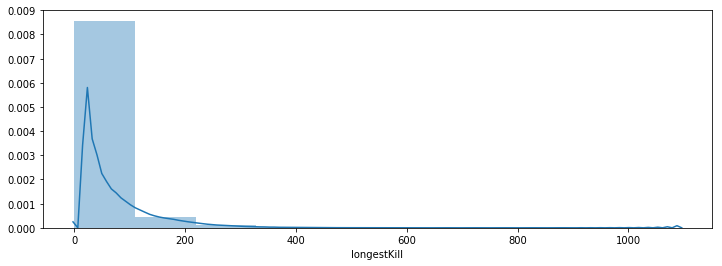

In [15]:
plot_outlier('longestKill')

As we see, there are few cases where player have a kill distance over 1000 meters, which should be impossible in this game

In [16]:
display(train[train['longestKill'] >= 1000].shape)
train.drop(train[train['longestKill'] >= 1000].index, inplace=True)

(20, 31)

/Users/lorenzo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


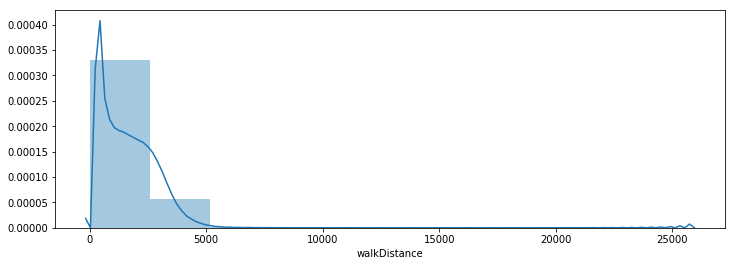

In [17]:
plot_outlier('walkDistance')

/Users/lorenzo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


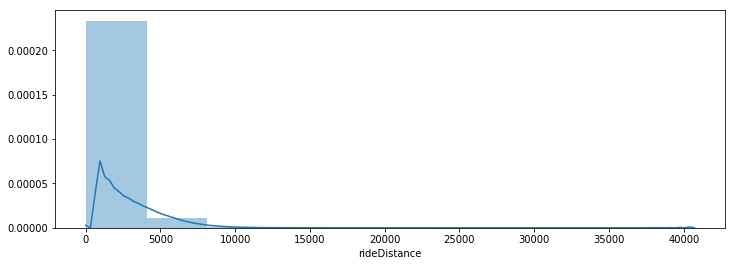

In [18]:
plot_outlier('rideDistance')

/Users/lorenzo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


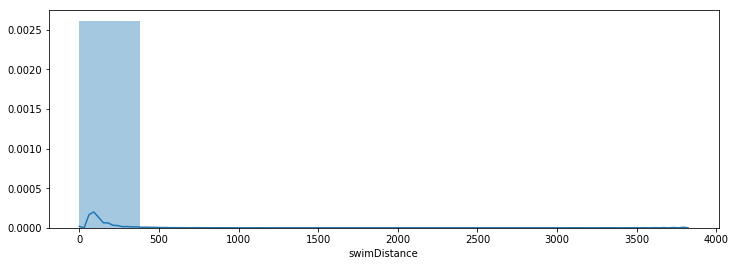

In [19]:
plot_outlier('swimDistance')

From above plots, it's fit to assume that observations have swimming distance greater than 3500, walking distance longer than 20000, and ride distance over 35000 are anomalies.

In [20]:
train.drop(train[train['swimDistance'] >= 3500].index, inplace=True)
train.drop(train[train['rideDistance'] >= 35000].index, inplace=True)
train.drop(train[train['walkDistance'] >= 20000].index, inplace=True)


/Users/lorenzo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


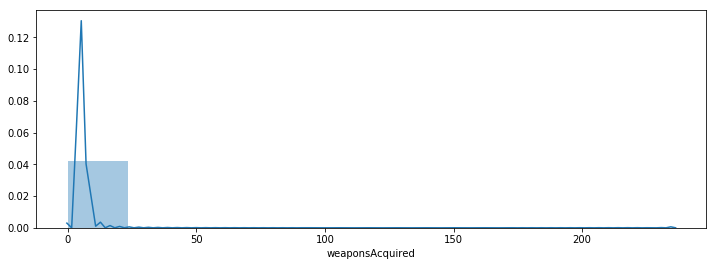

In [21]:
plot_outlier('weaponsAcquired')

While most players only acquire less than 30 weapons per match, there are users who has over 200 weapons in a match, and we consider them outliers.

In [22]:
train.drop(train[train['weaponsAcquired'] >= 200].index, inplace=True)

# Build Models

# Sample Model to reduce running time

In [23]:
train_sample=train.sample(frac=0.1, replace=True)

In [24]:
y=train_sample['winPlacePerc'].as_matrix().astype(np.float)
x=train_sample.drop(columns=['winPlacePerc', 'Id']).as_matrix().astype(np.float)

/Users/lorenzo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/lorenzo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


# Random Forest

In [25]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor



In [26]:
tuned_parameters = {'max_depth': [8,15,20], 'max_features': [4,5,6]}
type(tuned_parameters)

dict

In [27]:
for i in tuned_parameters['max_depth']:
  for j in tuned_parameters['max_features']:
    
    rf=RandomForestRegressor(max_depth=i,max_features=j, n_estimators=125)
    cv_results_rf = cross_validate(rf, x, y, cv=3, return_train_score=False,scoring='neg_mean_absolute_error')
    print('max_depth',i,'max_features',j,':', abs(cv_results_rf['test_score'].mean()))

max_depth 8 max_features 4 : 0.0854226154167686
max_depth 8 max_features 5 : 0.08162305270059507
max_depth 8 max_features 6 : 0.07830205960973496
max_depth 15 max_features 4 : 0.06844455568093938
max_depth 15 max_features 5 : 0.06568091597493865
max_depth 15 max_features 6 : 0.06394761220206112
max_depth 20 max_features 4 : 0.06312704681157495
max_depth 20 max_features 5 : 0.061445074010065125
max_depth 20 max_features 6 : 0.06027703991275347


The best parameter is max_depth=20, max_feature=6

# Gradient Boosting

In [56]:
import xgboost as xgb


params = {'max_depth': [5,6,7,8],'subsample':[0.6,0.7,0.8]}

In [57]:

for i in params['max_depth']:
  for j in params['subsample']:
    
    model_xgboost = xgb.XGBRegressor(n_estimators=125,subsample=j, colsample_bytree=1, max_depth=i)
    cv_results_xgb = cross_validate(model_xgboost, x, y, cv=5, return_train_score=False,scoring='neg_mean_absolute_error')
    print('max_depth',i,'subsample',j,':', abs(cv_results_xgb['test_score'].mean()))

max_depth 5 subsample 0.6 : 0.06006674379824948
max_depth 5 subsample 0.7 : 0.05994743942107235
max_depth 5 subsample 0.8 : 0.059995708377725034
max_depth 6 subsample 0.6 : 0.058621726115346204
max_depth 6 subsample 0.7 : 0.05863682667496234
max_depth 6 subsample 0.8 : 0.058602534805702475
max_depth 7 subsample 0.6 : 0.057700433078864154
max_depth 7 subsample 0.7 : 0.0576458173962114
max_depth 7 subsample 0.8 : 0.05756723071343837
max_depth 8 subsample 0.6 : 0.0570261927662295
max_depth 8 subsample 0.7 : 0.057023219517014966
max_depth 8 subsample 0.8 : 0.05689724965780076


The best parameter is max_depth=6, subsample=0.8

# Prediction

In [0]:
test_path = 'drive/My Drive/Data Mining Final Project/test_V2.csv'
test=pd.read_csv(test_path)

In [0]:
test['playersJoined'] = test.groupby('matchId')['matchId'].transform('count')


In [0]:
def norm_feature_test(col):
  test[col]=test[col]*((100-test['playersJoined'])/100+1)


norm_feature_test('kills')
norm_feature_test('damageDealt')
norm_feature_test('maxPlace')
norm_feature_test('matchDuration')

In [0]:
test['matchType'] = test['matchType'].map(mapper)
temp=pd.get_dummies(test['matchType'],drop_first=True)
test=pd.concat([test,temp],axis=1)

In [0]:
test=test.drop(drop_col,axis=1)

In [0]:
test['totalDistance'] = test['rideDistance'] + test['walkDistance'] + test['swimDistance']
test['killsWithoutMoving'] = ((test['kills'] > 0) & (test['totalDistance'] == 0))
test['headshot_rate'] = test['headshotKills'] / test['kills']
test['headshot_rate'] = test['headshot_rate'].fillna(0)

In [0]:
x_test=test.drop(columns=['Id']).as_matrix().astype(np.float)

# Random Forest

In [0]:
rf=RandomForestRegressor(max_depth=20,max_features=6, n_estimators=125)
rf.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [0]:
rf.predict(x_test)

array([0.21638284, 0.8522389 , 0.52871128, ..., 0.83231879, 0.77769509,
       0.06041772])

# XG Boosting

In [0]:
xgboost = xgb.XGBRegressor(n_estimators=125,subsample=0.8, colsample_bytree=1, max_depth=5)
xgboost.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=125,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [0]:
xgboost.predict(x_test)

array([0.21789086, 0.9045499 , 0.56491435, ..., 0.8480339 , 0.86569285,
       0.06182858], dtype=float32)